(108,)
(108,)


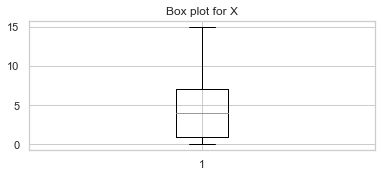

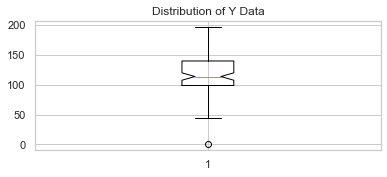

27.29835390946505
104.61358230449345 2.6983543955599423
[107.3119367  118.10535428 118.10535428 115.40699989 107.3119367
 104.6135823  104.6135823  123.50206307 107.3119367  118.10535428
 123.50206307]
[107.3119367  118.10535428 118.10535428 115.40699989 107.3119367
 104.6135823  104.6135823  123.50206307 107.3119367  118.10535428
 123.50206307] 

 [101. 137.  99. 134. 146. 180. 109.  62. 189.  88. 196.]
-0.2928938653016109
-0.265917791501111


C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: MatplotlibDeprecationWarning: Support for uppercase single-letter colors is deprecated since Matplotlib 3.1 and will be removed in 3.3; please use lowercase instead.
  fig.canvas.print_figure(bytes_io, **kw)


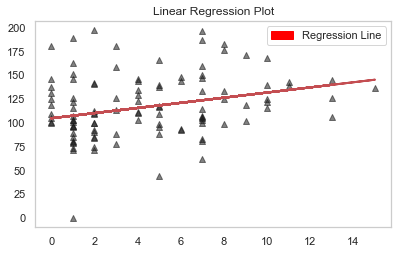

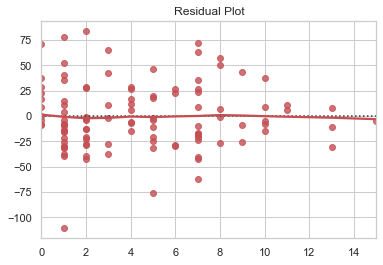

In [3]:
#Loading Essestial Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
#from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
#from sklearn.metrics import r2_score
import matplotlib.patches as mpatches

#finding the Slope of linear regression line
def Slope(a,b):
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    slope=(n*two_sum-sumX*sumY)/(n*sumX_2-(sumX)**2)
    return slope

#Finding Intercept of linear regression line
def Intercept(a,b):
    intercept=np.mean(b)-Slope(a,b)*np.mean(a)
    return intercept

#predictions are made with the help of linear regression algorithm
def Predictions(slope,x_input,intercept):
    predict=slope*x_input + intercept
    return predict

#R-squared is regression metric
def R_squared(predicted_values,test_values):
    f=predicted_values
    y=test_values
    print(f,'\n\n',y)
    #sum of squares
    ss_total=np.sum((y-np.mean(y))**2)
    #regression sum
    #ss_reg=np.sum((f-np.mean(y))**2)
    #Residuals sum of squares
    ss_res=np.sum((y-f)**2)
    #R-squared formula
    R_2=1-(ss_res/ss_total)
    return R_2

#Finding Correlation Coefficient for the given X & Y values
def correlation_coeff(predicted_values,test_values):
    a=predicted_values
    b=test_values
    n=len(a)
    two_sum=np.sum(a*b)
    sumX=np.sum(a)
    sumY=np.sum(b)
    sumX_2=np.sum(a**2)
    sumY_2=np.sum(b**2)
    score=(n*two_sum-sumX*sumY)/np.sqrt((n*sumX_2-(sumX)**2)*(n*sumY_2-(sumY)**2))
    return score

#Finding Covariance for the given X & Y values
def Covariance(X,Y):
    a=X
    b=Y
    n=len(a)
    two_sum=np.sum(a*b)
    cov=two_sum/n-np.mean(a)*np.mean(b)
    return cov
     
#Importing data(csv format) using pandas 
#Replace another dataset to make predictions
dataset=pd.read_csv('./dataset/salary_data.csv') 

# Split-out validation dataset
#knowing the dimenstions of data and making them READY for PREDICTIONS.
array = dataset.values
X = array[:,0]
#print(X.shape)
#X=X.reshape(1,-1).T
print(X.shape)
Y = array[:,1]
print(Y.shape)

#To know the distribution of data let us plot box plot
## 1
left = 0.1
width = 0.8
#fig=plt.figure()
#fig,(ax1,ax2) = plt.subplots(nrows=2,ncols=1,sharex=False,sharey=True)
ax1 = plt.axes([left, 0.5, width, 0.45])
ax1.boxplot(X)
ax1.set_title('Box plot for X')
plt.show()
## 2
ax2 = plt.axes([left, 0.5, width, 0.45])
ax2.boxplot(Y, '.-')
ax2.set_title('Distribution of Y Data')
plt.show()

#Covariation in data
print(Covariance(X,Y))

#Dividing data into training and testing classes
test_size = 0.10
seed = 7
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y,test_size= test_size, random_state=seed)

#finding intercepts of rgression line
intercept=Intercept(X_train,Y_train)
slope=Slope(X_train,Y_train)
print(intercept,slope)
predictions=Predictions(slope=slope,x_input=X_validation,intercept=intercept)
print(predictions)
print(R_squared(predicted_values=predictions,test_values=Y_validation))
print(correlation_coeff(test_values=Y_validation,predicted_values=predictions))

#Equation of Linear Regression
y=slope*X+intercept

#plotting the linear regression function
plt.scatter(X,Y,marker='^',color='k',alpha=0.55)
plt.plot(X,y,color='R',linewidth=2)
red_patch = mpatches.Patch(color='red', label='Regression Line')
plt.legend(loc=0,handles=[red_patch])
plt.title('Linear Regression Plot')
plt.tight_layout(pad=2)
plt.grid(False)
plt.show()

#Residual plots
sns.set(style="whitegrid")
# Make an example dataset with y ~ x
rs = np.random.RandomState(7)
#Plot the residuals after fitting a linear model
sns.residplot(X, Y, lowess=True, color="r")
plt.title('Residual Plot')
plt.show()

#--------------------------------------------------------------#

